# 1. Libraries importieren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2 Datenbearbeitung

## 2.1 Importieren der Daten

In [2]:
training_data = 'training_data.csv'
freq = 100
xyz = pd.read_csv(training_data, encoding='latin-1')
xyz

,Ax,Ay,Az,_id,date,time;;;;;;;;;;;;;;
0,0.70874,-0.36377,0.56201,621ce5ceeec56e62773d6103,10:06.4,0;;;;;;;;;;;;;;
1,0.75684,-0.35938,0.51416,621ce5ceeec56e62773d6104,10:07.0,0.005833333333333334;;;;;;;;;;;W;1;W?schen;47349
2,0.75269,-0.31909,0.47119,621ce5ceeec56e62773d6105,10:07.0,0.011666666666666667;;;;;;;;;;;P;2;Pumpen;4692
3,0.77026,-0.34131,0.43872,621ce5cfeec56e62773d6106,10:07.0,0.0175;;;;;;;;;;;WZA;3;Wasserzu- und -abfuhr;5593
4,0.82813,-0.31323,0.46753,621ce5cfeec56e62773d6107,10:07.0,0.023333333333333334;;;;;;;;;;;S;4;Schleudern;...
...,...,...,...,...,...,...
63575,1.03662,-0.03320,0.00781,621cf1cf6f74cc9c608aa753,01:19.2,0.5646280991735537;;;;;;;;;;Aus;;;;
63576,1.03076,-0.02759,0.00732,621cf1cf6f74cc9c608aa754,01:19.5,0.5696694214876032;;;;;;;;;;Aus;;;;
63577,1.03931,-0.03076,0.00488,621cf1cf6f74cc9c608aa755,01:19.5,0.5747107438016529;;;;;;;;;;Aus;;;;
63578,1.03613,-0.02734,0.00684,621cf1cf6f74cc9c608aa756,01:19.5,0.5797520661157025;;;;;;;;;;Aus;;;;


## 2.2 Datenreinigung

In [3]:
xyz.drop('date', inplace=True, axis=1)

In [4]:
#Index ohne status reinigen
xyz = xyz.drop(range(0,32))
xyz = xyz.drop(range(63450,63501))

In [5]:
xyz=xyz.reset_index(drop=True)

In [6]:
xyz.columns = ['Ax', 'Ay', 'Az', '_id','time']
xyz

,Ax,Ay,Az,_id,time
0,0.83984,-0.39941,0.37427,621ce5d0eec56e62773d6124,0.16285714285714287;;;;;;;;;;W;;;;
1,0.79907,-0.37720,0.35913,621ce5d0eec56e62773d6125,0.16794642857142858;;;;;;;;;;W;;;;
2,0.84546,-0.39746,0.35913,621ce5d0eec56e62773d6126,0.1730357142857143;;;;;;;;;;W;;;;
3,0.91577,-0.35669,0.35181,621ce5d0eec56e62773d6127,0.178125;;;;;;;;;;W;;;;
4,0.91943,-0.35571,0.34399,621ce5d0eec56e62773d6128,0.18321428571428572;;;;;;;;;;W;;;;
...,...,...,...,...,...
63492,1.03662,-0.03320,0.00781,621cf1cf6f74cc9c608aa753,0.5646280991735537;;;;;;;;;;Aus;;;;
63493,1.03076,-0.02759,0.00732,621cf1cf6f74cc9c608aa754,0.5696694214876032;;;;;;;;;;Aus;;;;
63494,1.03931,-0.03076,0.00488,621cf1cf6f74cc9c608aa755,0.5747107438016529;;;;;;;;;;Aus;;;;
63495,1.03613,-0.02734,0.00684,621cf1cf6f74cc9c608aa756,0.5797520661157025;;;;;;;;;;Aus;;;;


In [7]:
def alphanum(element):
    
    return "".join(filter(str.isalnum, element))

In [8]:
xyz.loc[:,'status'] = [alphanum(x) for x in xyz.time]
xyz['status'] = xyz['status'].str.replace('\d+', '')

C:\Users\dav11\AppData\Local\Temp\ipykernel_4256\3327937481.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  xyz['status'] = xyz['status'].str.replace('\d+', '')


In [9]:
xyz

,Ax,Ay,Az,_id,time,status
0,0.83984,-0.39941,0.37427,621ce5d0eec56e62773d6124,0.16285714285714287;;;;;;;;;;W;;;;,W
1,0.79907,-0.37720,0.35913,621ce5d0eec56e62773d6125,0.16794642857142858;;;;;;;;;;W;;;;,W
2,0.84546,-0.39746,0.35913,621ce5d0eec56e62773d6126,0.1730357142857143;;;;;;;;;;W;;;;,W
3,0.91577,-0.35669,0.35181,621ce5d0eec56e62773d6127,0.178125;;;;;;;;;;W;;;;,W
4,0.91943,-0.35571,0.34399,621ce5d0eec56e62773d6128,0.18321428571428572;;;;;;;;;;W;;;;,W
...,...,...,...,...,...,...
63492,1.03662,-0.03320,0.00781,621cf1cf6f74cc9c608aa753,0.5646280991735537;;;;;;;;;;Aus;;;;,Aus
63493,1.03076,-0.02759,0.00732,621cf1cf6f74cc9c608aa754,0.5696694214876032;;;;;;;;;;Aus;;;;,Aus
63494,1.03931,-0.03076,0.00488,621cf1cf6f74cc9c608aa755,0.5747107438016529;;;;;;;;;;Aus;;;;,Aus
63495,1.03613,-0.02734,0.00684,621cf1cf6f74cc9c608aa756,0.5797520661157025;;;;;;;;;;Aus;;;;,Aus


In [10]:
# Noisy Data entfernen
index_over = xyz[xyz['Ax'] > 1.99].index
xyz.drop(index_over , inplace=True)
index_under = xyz[xyz['Ax'] < 0.5].index
xyz.drop(index_under , inplace=True)

In [11]:
index_over = xyz[xyz['Ay'] > 1].index
xyz.drop(index_over , inplace=True)
index_under = xyz[xyz['Ay'] < -0.6].index
xyz.drop(index_under , inplace=True)

In [12]:
xyz['time'] = xyz['time'].str.extract('(\d+\.\d+)', expand=False)
xyz['time'] = xyz['time'].astype('float64')

In [13]:
xyz = xyz[['_id','Ax','Ay','Az','time','status']]

In [14]:
# tauschen Status vom Text zu Nummer
xyz['status'] = xyz['status'].replace(['W','P','WZA','S','Aus'],[0,1,2,3,4])

In [15]:
xyz.head(10)

,_id,Ax,Ay,Az,time,status
0,621ce5d0eec56e62773d6124,0.83984,-0.39941,0.37427,0.162857,0
1,621ce5d0eec56e62773d6125,0.79907,-0.37720,0.35913,0.167946,0
2,621ce5d0eec56e62773d6126,0.84546,-0.39746,0.35913,0.173036,0
3,621ce5d0eec56e62773d6127,0.91577,-0.35669,0.35181,0.178125,0
4,621ce5d0eec56e62773d6128,0.91943,-0.35571,0.34399,0.183214,0
5,621ce5d0eec56e62773d6129,0.90601,-0.40845,0.37354,0.188304,0
6,621ce5d0eec56e62773d612a,0.88135,-0.44214,0.31006,0.193393,0
7,621ce5d0eec56e62773d612b,0.88843,-0.39502,0.28247,0.198482,0
8,621ce5d0eec56e62773d612c,0.87915,-0.42700,0.28223,0.203571,0
9,621ce5d0eec56e62773d612d,0.83960,-0.53174,0.34546,0.208661,0


In [16]:
xyz["status"] = pd.to_numeric(xyz["status"])
xyz.dtypes

_id        object
Ax        float64
Ay        float64
Az        float64
time      float64
status    float64
dtype: object

In [17]:
# compression_opts = dict(method='zip',
#                         archive_name='out.csv')  
# xyz.to_csv('out.zip', index=False,
#           compression=compression_opts)  

## 2.3 Fastfouriertrnsformation-Funktion definieren

In [17]:
#Fastfouriertransformation Funktion definieren
def FFT(acc, nrsamples):
    acc_without_mean = acc - np.mean(acc,axis=0)  # Subtract mean Value to reduce the DC Offset in the FFT
    freq = np.fft.rfft(acc_without_mean, nrsamples, norm='ortho')
    freq = np.abs(freq)
    freq = freq / nrsamples  # Normalize the Amplitude by the known sample number
    return freq

In [19]:
# Die Daten vorbereiten für die Visualisierung
size = int(xyz.size/4)

Ax = xyz.iloc[:,1]
Ay = xyz.iloc[:,2]
Az = xyz.iloc[:,3]
time = xyz.iloc[:,4]

ax_freq = FFT(np.array(Ax), size)
ay_freq = FFT(np.array(Ay), size)
az_freq = FFT(np.array(Az), size)
a_abs = np.sqrt(Ax*Ax+Ay*Ay+Az*Az)

a_freq = FFT(a_abs, size)
x_freq = np.linspace(0.0, (freq / 2), int(size / 2) + 1)

print(len(a_freq))
print(len(x_freq))

47591
47591


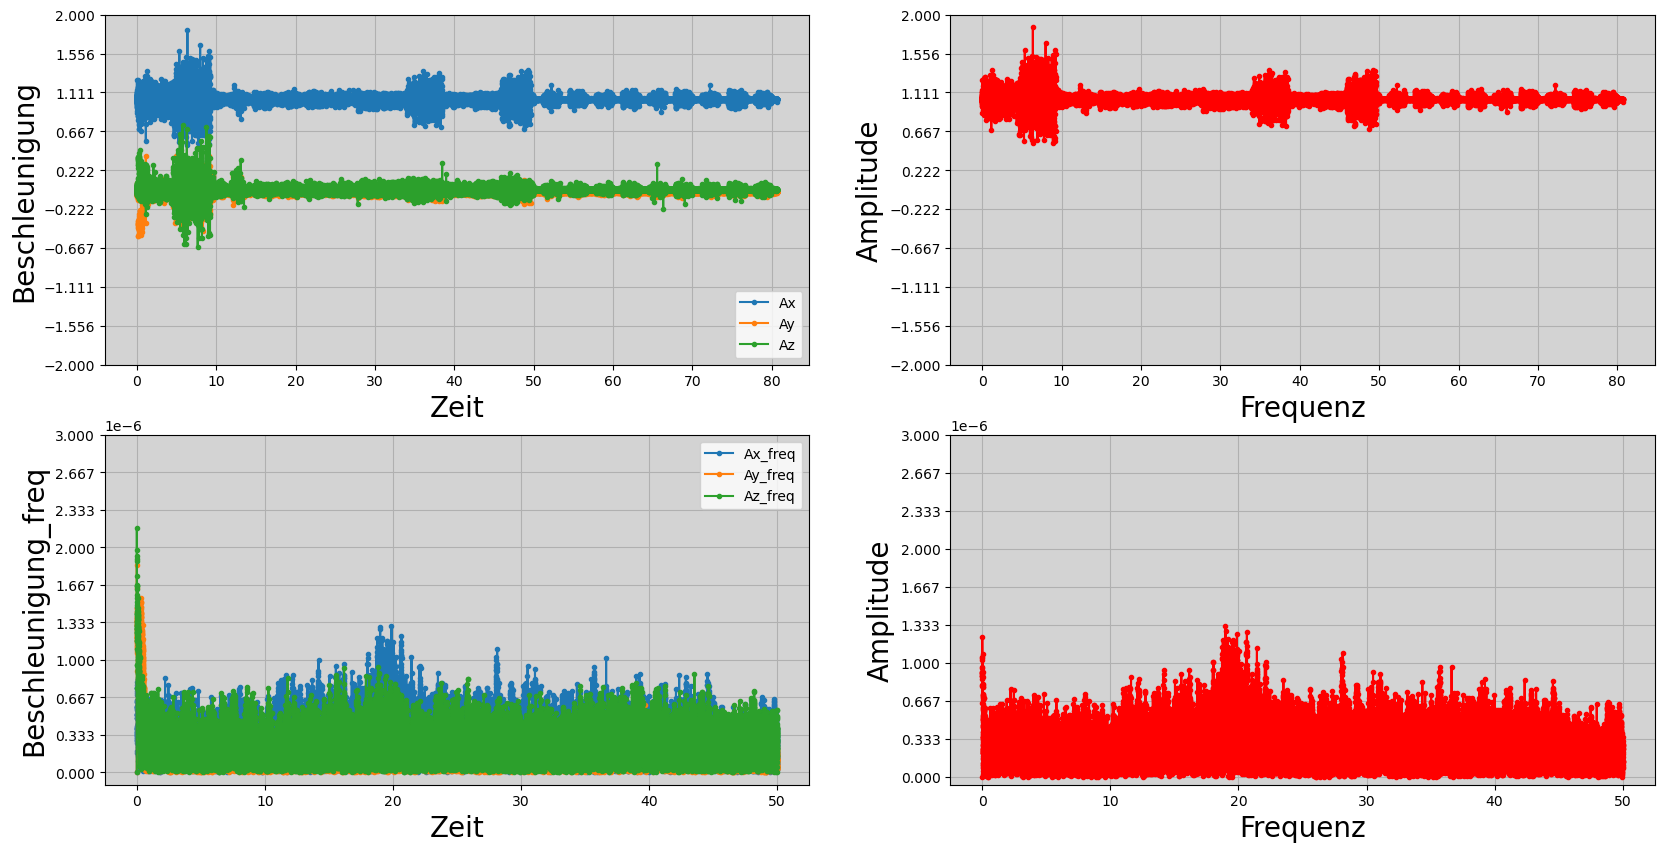

In [21]:
# Visualisierung Daten
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax1 = ax[0,0]
ax1.plot(time, Ax,'.-', label="Ax")
ax1.plot(time, Ay,'.-', label="Ay")
ax1.plot(time, Az,'.-', label="Az")
ax1.set_xlabel('Zeit',fontsize=20)
ax1.set_ylabel('Beschleunigung',fontsize=20)
ax1.legend(loc="lower right")
ax1.grid()
ax1.set_facecolor('lightgrey')

ax2 = ax[0,1]
ax2.plot(time, a_abs, '.-', label="a_freq", color='red')
ax2.set_xlabel('Frequenz',fontsize=20)
ax2.set_ylabel('Amplitude',fontsize=20)
ax2.grid()
ax2.set_facecolor('lightgrey')

ax3 = ax[1,0]
ax3.plot(x_freq, ax_freq,'.-', label="Ax_freq")
ax3.plot(x_freq, ay_freq,'.-', label="Ay_freq")
ax3.plot(x_freq, az_freq,'.-',label="Az_freq")
ax3.set_xlabel('Zeit',fontsize=20)
ax3.set_ylabel('Beschleunigung_freq',fontsize=20)
ax3.legend(loc="upper right")
ax3.grid()
ax3.set_facecolor('lightgrey')

ax4 = ax[1,1]
ax4.plot(x_freq, a_freq, '.-', label="A_freq", color='red')
ax4.set_xlabel('Frequenz',fontsize=20)
ax4.set_ylabel('Amplitude',fontsize=20)
ax4.grid()
ax4.set_facecolor('lightgrey')

ax1.set_yticks(np.linspace(-2,2,10))
ax2.set_yticks(np.linspace(-2,2,10))
ax3.set_yticks(np.linspace(0,3*1e-6,10))
ax4.set_yticks(np.linspace(0,3*1e-6,10))


plt.show()

## 2.4 Datensätze duplizieren für Stichproben

In [22]:
xyz['a_abs'] = a_abs
len(xyz)

63454

In [23]:
xyz_times = pd.DataFrame()

for i in range(0,200):
    xyz_times = pd.concat([xyz_times,xyz])

In [24]:
xyz_times

,_id,Ax,Ay,Az,time,status,a_abs
0,621ce5d0eec56e62773d6124,0.83984,-0.39941,0.37427,0.162857,0.0,1.002466
1,621ce5d0eec56e62773d6125,0.79907,-0.37720,0.35913,0.167946,0.0,0.953817
2,621ce5d0eec56e62773d6126,0.84546,-0.39746,0.35913,0.173036,0.0,1.000875
3,621ce5d0eec56e62773d6127,0.91577,-0.35669,0.35181,0.178125,0.0,1.043855
4,621ce5d0eec56e62773d6128,0.91943,-0.35571,0.34399,0.183214,0.0,1.044131
...,...,...,...,...,...,...,...
63492,621cf1cf6f74cc9c608aa753,1.03662,-0.03320,0.00781,0.564628,4.0,1.037181
63493,621cf1cf6f74cc9c608aa754,1.03076,-0.02759,0.00732,0.569669,4.0,1.031155
63494,621cf1cf6f74cc9c608aa755,1.03931,-0.03076,0.00488,0.574711,4.0,1.039777
63495,621cf1cf6f74cc9c608aa756,1.03613,-0.02734,0.00684,0.579752,4.0,1.036513


# 3. Inputdaten für den Klassifikator vorbereiten

## 3.1 Größe für jeden Status bestimmen

In [25]:
columns = 100 #100 Stichtproben werden am Ende

In [26]:
samples = []
for i in range(5):
    a_abs_cat = xyz_times[xyz_times['status']==i]
    samples.append(len(a_abs_cat))
    
rows = int(min(samples)/columns)*columns
rows = int((rows/2)/columns)*columns*2
for i in range(0,5):
    print('Status ',i, ': ', samples[i], ' samples')
    
print('\nSize limit of one status:',rows)
#(['W','P','WZA','S','Aus'],[0,1,2,3,4])

Status  0 :  9410400  samples
Status  1 :  937400  samples
Status  2 :  1107800  samples
Status  3 :  1065400  samples
Status  4 :  94800  samples

Size limit of one status: 94800


## 3.2 Frequenz für jeden Status berechnen

In [27]:
xyz_times = xyz_times.fillna(0)
xyz_times['status'] = xyz_times['status'].astype(np.int64)
xyz_times.dtypes

_id        object
Ax        float64
Ay        float64
Az        float64
time      float64
status      int64
a_abs     float64
dtype: object

In [28]:
df_freq_pro_status = pd.DataFrame()
df_a_abs_status = pd.DataFrame()

for i in range(5):
    
    a_abs_each_cat = xyz_times[xyz_times['status']==i].iloc[0:rows,6].reset_index(drop=True)
    
    df_a_abs_status[str(i)]= a_abs_each_cat

    df_freq_sep_collection = pd.DataFrame()
    
    for x in range(0,len(df_a_abs_status),columns*2):
        
        df_a_abs_status_sep = df_a_abs_status.iloc[x:x+columns*2,i]

        freq_cat_sep_arr = FFT(df_a_abs_status_sep, len(df_a_abs_status_sep))
        
        df_calcFFT = pd.DataFrame(freq_cat_sep_arr)
        df_calcFFT = df_calcFFT.drop(0)

        df_freq_sep_collection = pd.concat([df_freq_sep_collection, df_calcFFT])

    df_freq_sep_collection = df_freq_sep_collection.reset_index(drop=True)
        
    df_freq_pro_status[str(i)]= df_freq_sep_collection[0]
   
df_freq_pro_status

,0,1,2,3,4
0,0.000426,0.000061,0.000064,0.000017,0.000049
1,0.000246,0.000090,0.000075,0.000016,0.000034
2,0.001089,0.000107,0.000169,0.000065,0.000027
3,0.000367,0.000122,0.000161,0.000029,0.000092
4,0.001253,0.000155,0.000070,0.000097,0.000077
...,...,...,...,...,...
47395,0.000617,0.000038,0.000125,0.000406,0.000055
47396,0.001434,0.000027,0.000070,0.000187,0.000090
47397,0.001487,0.000019,0.000041,0.000312,0.000264
47398,0.001371,0.000035,0.000059,0.000278,0.000143


C:\Users\dav11\AppData\Local\Temp\ipykernel_4256\4263441732.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  ax1.plot(x_time_set, a_abs,'g', linewidth=0.4, ms=1,color='red')


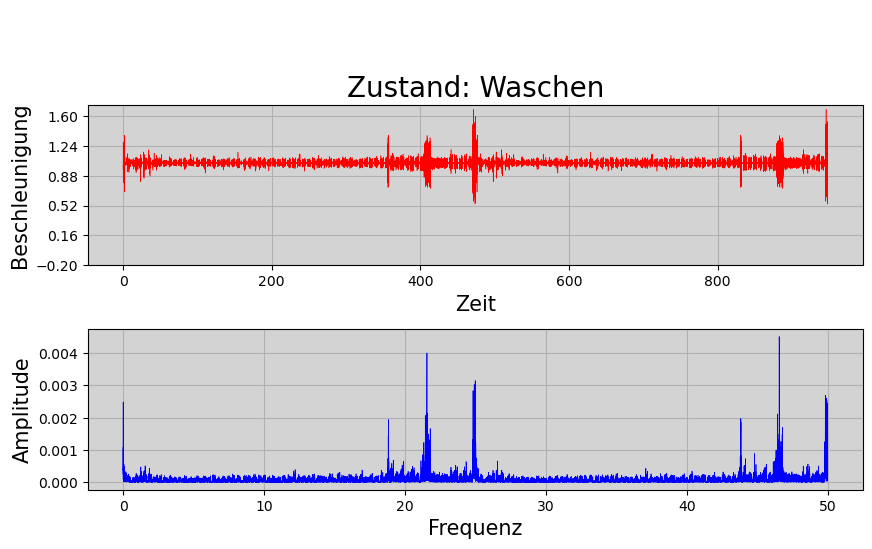

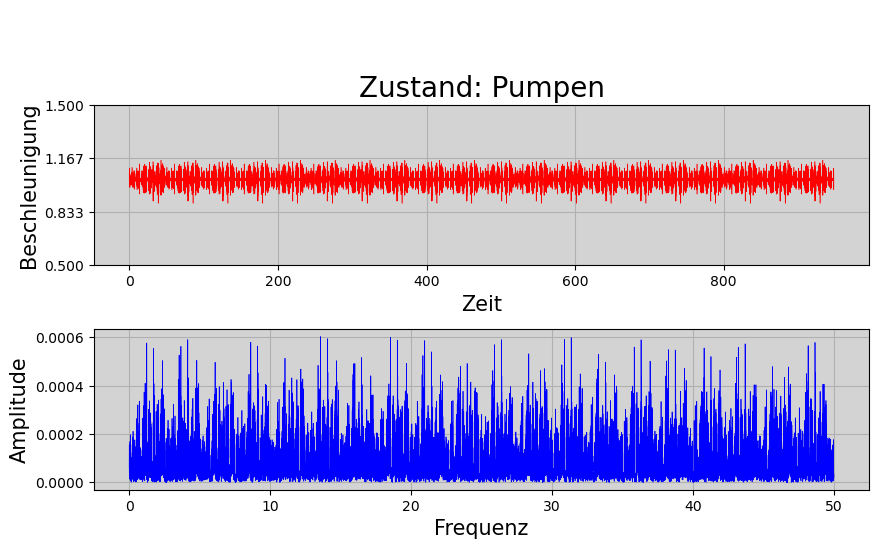

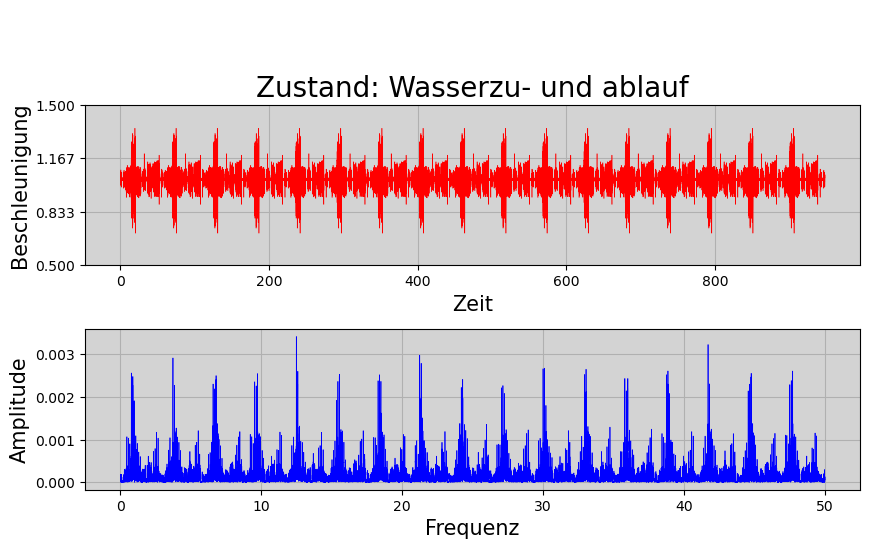

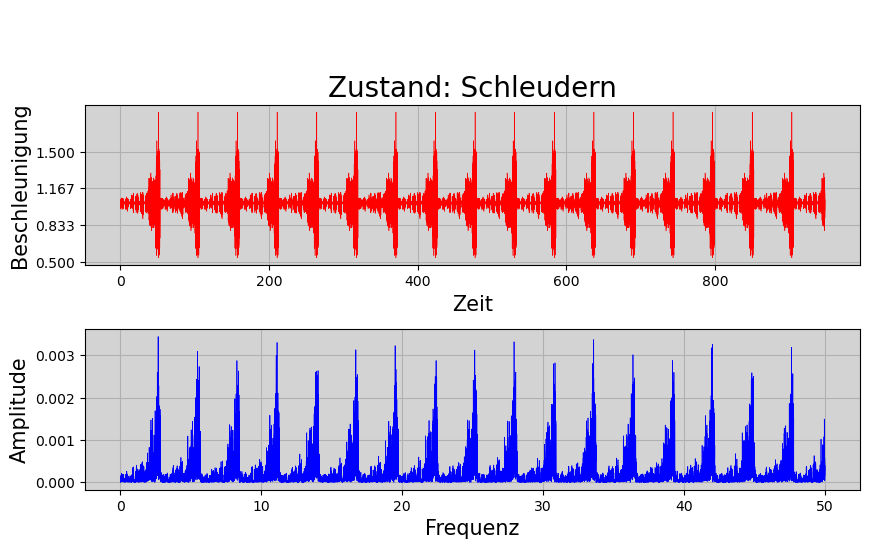

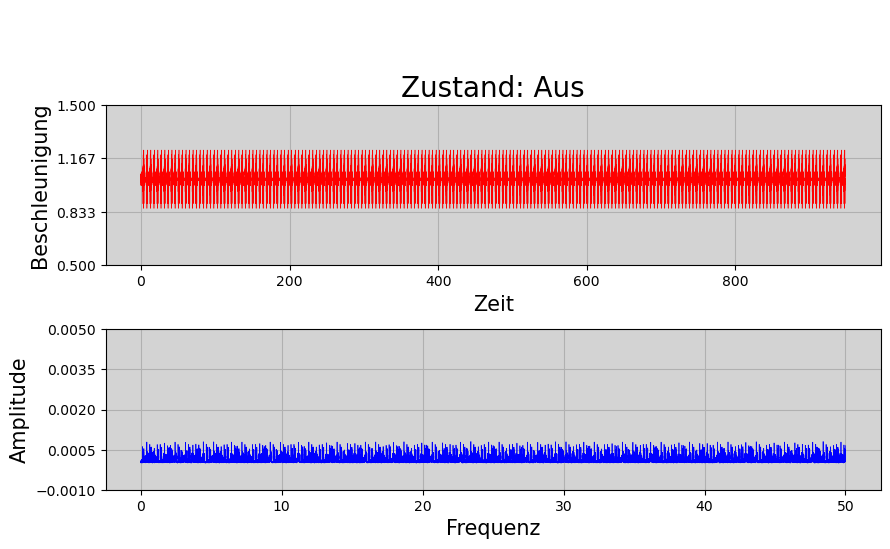

In [29]:
# Visualisierung jedes Status
classes = ['Waschen','Pumpen','Wasserzu- und ablauf','Schleudern','Aus']

for n in df_freq_pro_status:
    
    a_abs = df_a_abs_status[n].values
    a_abs_freq= df_freq_pro_status[n].values
    x_freq_set= np.linspace(0.0, (freq / 2), int(len(a_abs) / 2))
    x_time_set= np.linspace(0.0, (1 / freq) * len(a_abs), len(a_abs)).round(3)
    
    fttfig, axs = plt.subplots(2,1, figsize=(10, 5))

########################### Beschleunigung und Zeit ###############################       
    
    ax1 = axs[0]
    ax1.set_title('\n\nZustand: ' + classes[int(n)],fontsize=20)
    ax1.plot(x_time_set, a_abs,'g', linewidth=0.4, ms=1,color='red')    
    ax1.set_ylabel("Beschleunigung",fontsize=15)
    ax1.set_xlabel("Zeit",fontsize=15)
    ax1.grid()
    ax1.set_facecolor('lightgrey') 
    if n == '0':
        ax1.set_yticks(np.linspace(-0.2,1.6,6))
    else:
        ax1.set_yticks(np.linspace(0.5,1.5,4))
        
########################### Amplitude und Frequenz ###############################      
    
    ax2 = axs[1]
    ax2.plot(x_freq_set, a_abs_freq, 'b', linewidth=0.5, ms=1)
    ax2.set_ylabel("Amplitude",fontsize=15)
    ax2.set_xlabel("Frequenz",fontsize=15)
    ax2.grid()
    ax2.set_facecolor('lightgrey')
    if n== '4':
        ax2.set_yticks(np.linspace(-0.001,0.005,5))

    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.show()

## 3.3 Frequenz_datenssätze für Klassifikator vorbereiten

In [30]:
def split_data(a, size):
    return np.split(a, np.arange(size,len(a),size))

freq_split = split_data(df_freq_pro_status, columns)

In [31]:
df_freqs = pd.DataFrame()

for i in range(0,len(freq_split)):
    
    df = freq_split[i].reset_index(drop=True)
    
    df_freqs = pd.concat([df_freqs,df.transpose()])        

df_freqs.reset_index(inplace=True)
df_freqs.rename(columns={'index':'status'}, inplace=True)
df_freqs = df_freqs.sort_values(by=['status'])
df_freqs = df_freqs.reset_index(drop=True)
df_freqs

,status,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,0.000426,0.000246,0.001089,0.000367,0.001253,0.001133,0.000091,0.002491,0.000559,...,0.000116,0.000301,0.000178,0.000195,0.000067,0.000212,0.000134,0.000165,0.000267,1.136311e-04
1,0,0.000157,0.000095,0.000193,0.000126,0.000055,0.000072,0.000054,0.000074,0.000131,...,0.000323,0.000177,0.000181,0.000069,0.000215,0.000123,0.000215,0.000082,0.000084,2.350795e-05
2,0,0.000085,0.000127,0.000050,0.000011,0.000014,0.000057,0.000097,0.000046,0.000115,...,0.000040,0.000027,0.000023,0.000024,0.000020,0.000059,0.000092,0.000068,0.000017,2.406245e-05
3,0,0.000056,0.000049,0.000058,0.000050,0.000070,0.000074,0.000045,0.000068,0.000050,...,0.000031,0.000036,0.000017,0.000008,0.000007,0.000022,0.000011,0.000019,0.000042,5.350485e-05
4,0,0.000037,0.000032,0.000025,0.000044,0.000058,0.000060,0.000078,0.000093,0.000080,...,0.000019,0.000039,0.000007,0.000002,0.000083,0.000082,0.000077,0.000037,0.000030,1.622243e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,4,0.000151,0.000173,0.000185,0.000140,0.000053,0.000070,0.000116,0.000129,0.000149,...,0.000085,0.000096,0.000116,0.000103,0.000070,0.000065,0.000074,0.000120,0.000118,9.064815e-05
2366,4,0.000772,0.000420,0.000084,0.000031,0.000100,0.000209,0.000099,0.000219,0.000109,...,0.000075,0.000455,0.000350,0.000057,0.000176,0.000091,0.000185,0.000167,0.000250,4.625782e-04
2367,4,0.000051,0.000054,0.000033,0.000061,0.000042,0.000043,0.000045,0.000010,0.000025,...,0.000034,0.000033,0.000019,0.000012,0.000011,0.000014,0.000035,0.000031,0.000041,2.798846e-05
2368,4,0.000051,0.000032,0.000029,0.000092,0.000074,0.000053,0.000016,0.000030,0.000037,...,0.000043,0.000050,0.000049,0.000062,0.000041,0.000053,0.000027,0.000051,0.000066,8.181259e-07


In [32]:
df_freqs.to_csv('Maschine_learning_' + training_data, index=False)

# 4. Daten mit verschiedenen Machine Learning Klassifikator trainieren und vergleichen

## 4.1 Daten mit MLPClassifier trainieren

In [33]:
# Machine Learning Libraries importieren
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [34]:
#Daten in Training- und Testdaten splitten
X = df_freqs.iloc[:, 1:].values
y = df_freqs.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

In [35]:
mlp = MLPClassifier(alpha=0.0001, max_iter=800, verbose=False, early_stopping=False)
mlp.fit(X_train_std,y_train)

MLPClassifier(max_iter=800)

In [36]:
predicted = mlp.predict(X_test_std)
probabilities = mlp.predict_proba(X_test_std)

In [37]:
print('Accuracy MLP: %.2f' % accuracy_score(y_test, predicted))

Accuracy MLP: 0.90


MLPClassifier(max_iter=800): 
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       142
           1       0.86      0.96      0.91       142
           2       0.90      0.94      0.92       142
           3       0.90      0.89      0.89       143
           4       0.98      1.00      0.99       142

    accuracy                           0.90       711
   macro avg       0.90      0.90      0.90       711
weighted avg       0.90      0.90      0.90       711




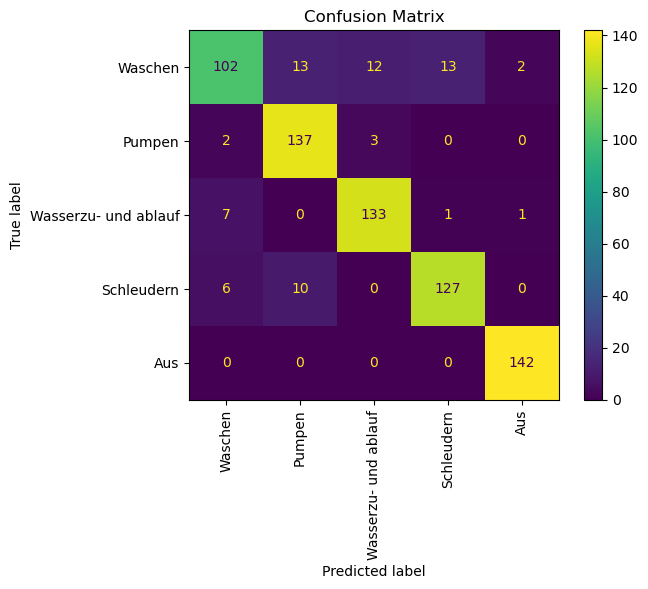

In [38]:
print("%s: \n%s\n"% (mlp, metrics.classification_report(y_test, predicted)))

cm = confusion_matrix(y_test, predicted, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
disp.plot()
ax = plt.gca()
ax.set_title('Confusion Matrix')
ax.set_xticklabels(labels=classes,rotation=90);

## 4.2 Daten mit verschiedene ML-Algorithmen trainieren

In [39]:
# Machinelearning Libaries importieren
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [40]:
tree = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test_std)
print('Accuracy Descision Tree: %.2f' % accuracy_score(y_test, y_pred))

Accuracy Descision Tree: 0.29


In [41]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test_std)
print('Accuracy Logistic Regression: %.2f' % accuracy_score(y_test, y_pred))

Accuracy Logistic Regression: 0.47


In [42]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test_std)
print('Accuracy SVM: %.2f' % accuracy_score(y_test, y_pred))

Accuracy SVM: 0.35


In [43]:
ppn = Perceptron(max_iter=800, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test_std)
print('Accuracy Perzeptron: %.2f' % accuracy_score(y_test, y_pred))

Accuracy Perzeptron: 0.41


# 5. Verschiedener Klassifikatoren mit duplizierten Trainingsdaten testen

In [44]:
xyz_times = xyz_times.fillna(0)
xyz_times['status'] = xyz_times['status'].astype(np.int64)
xyz_times

,_id,Ax,Ay,Az,time,status,a_abs
0,621ce5d0eec56e62773d6124,0.83984,-0.39941,0.37427,0.162857,0,1.002466
1,621ce5d0eec56e62773d6125,0.79907,-0.37720,0.35913,0.167946,0,0.953817
2,621ce5d0eec56e62773d6126,0.84546,-0.39746,0.35913,0.173036,0,1.000875
3,621ce5d0eec56e62773d6127,0.91577,-0.35669,0.35181,0.178125,0,1.043855
4,621ce5d0eec56e62773d6128,0.91943,-0.35571,0.34399,0.183214,0,1.044131
...,...,...,...,...,...,...,...
63492,621cf1cf6f74cc9c608aa753,1.03662,-0.03320,0.00781,0.564628,4,1.037181
63493,621cf1cf6f74cc9c608aa754,1.03076,-0.02759,0.00732,0.569669,4,1.031155
63494,621cf1cf6f74cc9c608aa755,1.03931,-0.03076,0.00488,0.574711,4,1.039777
63495,621cf1cf6f74cc9c608aa756,1.03613,-0.02734,0.00684,0.579752,4,1.036513


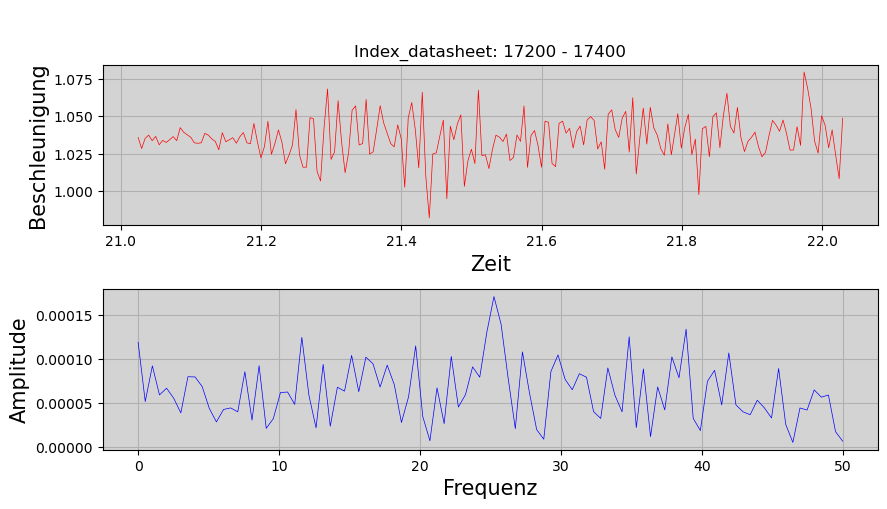

Status Description: 
0 = Waschen 
1 = Pumpen 
2 = Wasserzu- und ablauf 
3 = Schleudern 
4 = Ausgeschaltet 

Datasheet_status: 
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Status prediction from machine learning:
MLP: ['3']   Desc.Tree: ['1']   LR: ['0']   SVM: ['0']   PPN: ['1']


In [48]:
# status 0:
# daten_index_test = 50000 

# status 1:
# daten_index_test = 37625

# status 2:
# daten_index_test = 47300 

# status 3:
daten_index_test = 17200 

# status 4:
# daten_index_test = 28040 

limit = columns*2

for i in range(daten_index_test, daten_index_test+limit, limit):
    
    a_abs_test = xyz_times.iloc[i:i+limit,6]
    x_time_test = xyz_times.iloc[i:i+limit,4]
    a_freq_test = np.delete(FFT(a_abs_test, len(a_abs_test)),0)
    x_freq_test = np.linspace(0.0, (freq / 2), int(limit / 2))

########################### ausgewählte Daten darstellen ###############################     

    fttfig, axs = plt.subplots(2,1, figsize=(10, 5))
    ax1 = axs[0]
    ax1.plot(x_time_test, a_abs_test, linewidth=0.5, ms=1,color='red')    
    ax1.set_title('\n\nIndex_datasheet: ' + str(daten_index_test) + ' - ' + str(daten_index_test+limit))
    ax1.set_ylabel("Beschleunigung",fontsize=15)
    ax1.set_xlabel("Zeit",fontsize=15)
    ax1.set_facecolor('lightgrey')
    ax1.grid(True)  
    
    ax2 = axs[1]
    ax2.plot(x_freq_test, a_freq_test, 'b', linewidth=0.5, ms=1)
    ax2.set_ylabel("Amplitude",fontsize=15)
    ax2.set_xlabel("Frequenz",fontsize=15)
    ax2.set_facecolor('lightgrey')
    ax2.grid(True)
    
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
        
    plt.show()
    
    a_freq_test = a_freq_test.reshape(1,-1)
    a_freq_test_std = sc.transform(a_freq_test)

    pred_mlp = mlp.predict(a_freq_test_std)
    pred_destree = tree.predict(a_freq_test_std)
    pred_lr = lr.predict(a_freq_test_std)
    pred_svm = svm.predict(a_freq_test_std)
    pred_ppn = ppn.predict(a_freq_test_std)

    
    
    status= list(xyz_times.iloc[i:i+limit,5])
    
    print('Status Description: \n0 = Waschen \n1 = Pumpen \n2 = Wasserzu- und ablauf \n3 = Schleudern \n4 = Ausgeschaltet \n')
    
    print('Datasheet_status: \n',status)
    
    print('\nStatus prediction from machine learning:')
    
    
    print('MLP:',pred_mlp,
          '  Desc.Tree:', pred_destree,
          '  LR:',pred_lr,
          '  SVM:',pred_svm,        
          '  PPN:',pred_ppn)    